In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

In [3]:
def auto_canny(image, sigma=0.33, offset = 0):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v + offset))
	upper = int(min(255, (1.0 + sigma) * v + offset))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged

In [4]:
working_p = "./in/"
in_p = working_p + "prepared/"

files = [f for f in os.listdir(in_p)]

In [5]:
SINGLE_TEST = False

image_name = ""
image_extension = ""
channels = []
channel_names = []

if SINGLE_TEST:
    # image_name = "tire_interpolation-5.png"
    image_name = "hole_tire.jpg"
    # image_name = "hole_tire_colored.jpg"

    image_extension = image_name.split(".")[-1]
    image_name = image_name.split(".")[0]

    image = cv2.imread("./in/"+image_name+"."+image_extension)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    b, g, r = cv2.split(image)

    # channels = [b, g, r, cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)]
    # channel_names = ["blue", "green", "red", "gray"]

    channels = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)]
    channel_names = ["gray"]

else:

    image_name = "test"
    image_extension = ".jpeg"

    for f in files:
        image = cv2.imread(in_p + f)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        channels.append(gray)
        channel_names.append(f.split(".")[0])


image_extension = "jpeg"

Try automatic Canny tresholding method

In [6]:
for i, c in enumerate(channels):
    temp = c
    # temp = cv2.GaussianBlur(temp, (3, 3), 0)
    res_canny = cv2.Canny(temp, 80, 100)
    res_canny_auto = auto_canny(temp, sigma=0.8)

    cv2.imwrite("./out/canny_on_original/"+image_name+"_" + channel_names[i] + "_canny."+image_extension, res_canny, [cv2.IMWRITE_JPEG_QUALITY, 100])
    cv2.imwrite("./out/canny_on_original/"+image_name+"_" + channel_names[i] + "_canny-auto."+image_extension, res_canny_auto, [cv2.IMWRITE_JPEG_QUALITY, 100])

Histogram of the input channels

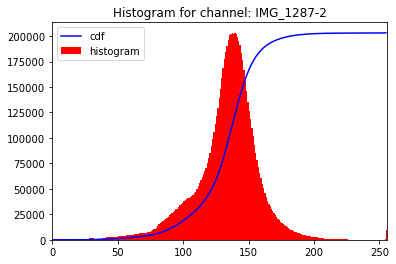

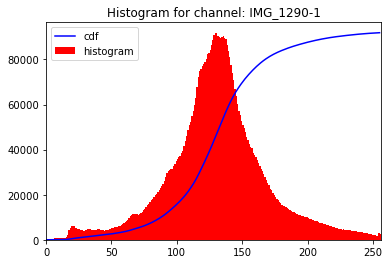

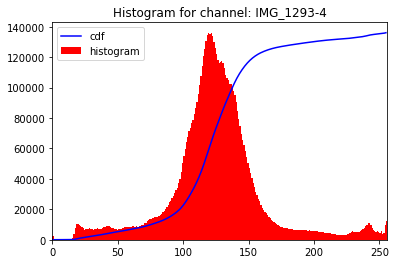

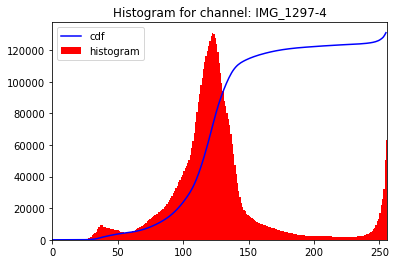

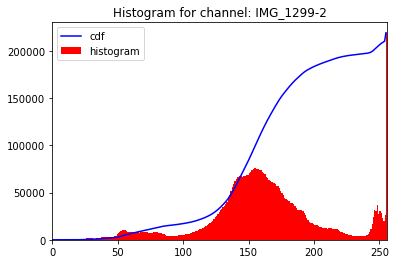

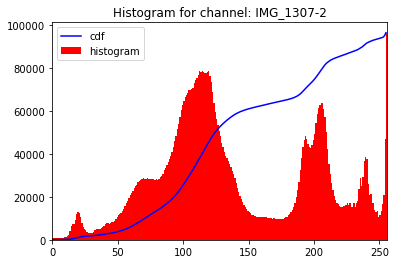

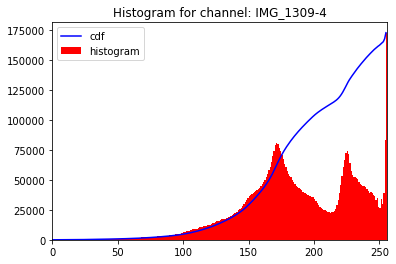

In [7]:
for i, c in enumerate(channels):
    hist,bins = np.histogram(c.flatten(),256,[0,256])
    
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(c.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title('Histogram for channel: ' + channel_names[i])
    plt.show()


Apply normal uniform Equalization of the Histogram

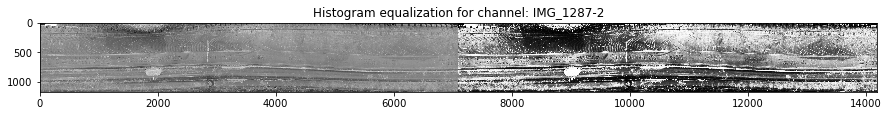

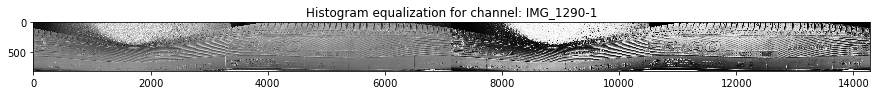

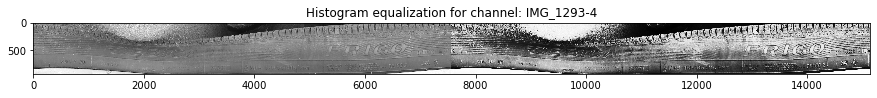

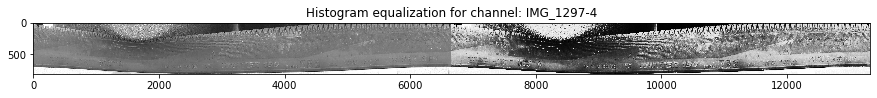

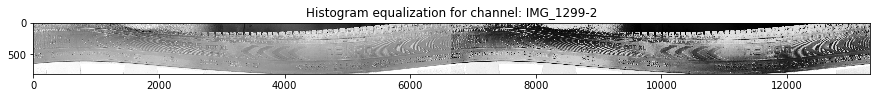

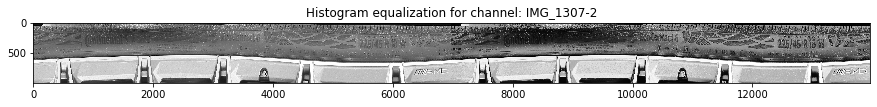

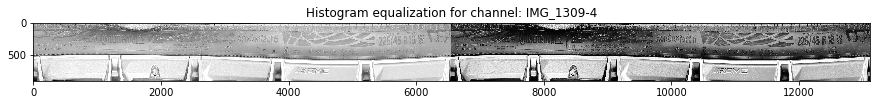

In [8]:
for i, c in enumerate(channels):
    equ = cv2.equalizeHist(c)
    res = np.hstack((c,equ)) #stacking images side-by-side

    # increase plot size
    plt.rcParams["figure.figsize"] = (15,7.5)
    plt.imshow(res, cmap='gray')
    plt.title('Histogram equalization for channel: ' + channel_names[i])
    plt.show()

Apply CLAHE

In [9]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(200,20))

chan_c = []

for i, c in enumerate(channels):
    temp = c
    # temp = cv2.GaussianBlur(temp, (3, 3), 0)
    res = clahe.apply(temp)
    chan_c.append(res)
    res = np.vstack((temp, res)) #stacking images side-by-side

    # plt.rcParams["figure.figsize"] = (15,7.5)
    # plt.imshow(res, cmap='gray')
    # plt.title('Histogram equalization for channel: ' + channel_names[i])
    # plt.show()

    cv2.imwrite("./out/clahe_on_original/"+image_name+"_" + channel_names[i] + "."+image_extension, res, [cv2.IMWRITE_JPEG_QUALITY, 100])

See the histogram for the CLAHE's output

In [1]:
for _, c in enumerate(chan_c):
    hist,bins = np.histogram(c.flatten(),256,[0,256])
    
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(c.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title('Histogram for channel: ' + channel_names[i])
    plt.show()

NameError: name 'chan_c' is not defined

Sobel on the original image

In [9]:
for i, c in enumerate(channels):
    temp = c

    temp = cv2.GaussianBlur(temp, (3, 3), 0)
    gx = cv2.Sobel(temp, cv2.CV_64F, 1, 0)
    gy = cv2.Sobel(temp, cv2.CV_64F, 0, 1)

    res_sobel = cv2.addWeighted(gx, 0.5, gy, 0.5, 0)

    cv2.imwrite("./out/sobel_on_original/"+image_name+"_" + channel_names[i] + "."+image_extension, res_sobel, [cv2.IMWRITE_JPEG_QUALITY, 100])

Try some Manual and Automatic Canny and Sobel directly on CLAHE's output

In [18]:
for i, c in enumerate(chan_c):
    temp = c
    # apply canny edge detector
    temp = cv2.GaussianBlur(temp, (5, 5), 0)
    res_canny = cv2.Canny(temp, 120, 160)
    res_canny_auto = auto_canny(temp, sigma=0.33, offset = 0)

    gx = cv2.Sobel(temp, cv2.CV_64F, 1, 0)
    gy = cv2.Sobel(temp, cv2.CV_64F, 0, 1)

    res_sobel = cv2.addWeighted(gx, 0.5, gy, 0.5, 0)

    cv2.imwrite("./out/canny-n-sobel_on_clahe/"+image_name+"_" + channel_names[i] + "_canny."+image_extension, res_canny, [cv2.IMWRITE_JPEG_QUALITY, 100])
    cv2.imwrite("./out/canny-n-sobel_on_clahe/"+image_name+"_"+channel_names[i]+"_canny-auto."+image_extension, res_canny_auto, [cv2.IMWRITE_JPEG_QUALITY, 100])
    cv2.imwrite("./out/canny-n-sobel_on_clahe/"+image_name+"_"+channel_names[i]+"_sobel."+image_extension, res_sobel, [cv2.IMWRITE_JPEG_QUALITY, 100])

Try some Otsu Thresholding on the original channel and on the CLAHE's output

**Observations**:

- Not good for text in hole images. But Otsu on the original image may be useful for removing the silver wheel's rim on the bottom of the immage if needed.

- On a smaller section that consists only of the tire, Otsu on the CLAHE image can show some letters and conturs, while on the original immage writting looks like noise because we didn't apply a blur.

In [11]:
print("On Original:")
for i, c in enumerate(channels):
    temp = c
    # temp = cv2.GaussianBlur(temp, (5, 5), 0)
    (T, res) = cv2.threshold(temp, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    print("\t", channel_names[i], "threshold value is:", T)
    cv2.imwrite("out/threshold_on_original/"+image_name+"_" + channel_names[i] +"_otsu."+image_extension, res, [cv2.IMWRITE_JPEG_QUALITY, 100])


print("On CLAHE:")
for i, c in enumerate(chan_c):
    temp = c
    (T, res) = cv2.threshold(temp, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    print("\t", channel_names[i], "threshold value is:", T)
    cv2.imwrite("out/threshold_on_clahe/"+image_name+"_" + channel_names[i] +"_otsu."+image_extension, res, [cv2.IMWRITE_JPEG_QUALITY, 100])

On Original:
	 IMG_1287-2 threshold value is: 123.0
	 IMG_1290-1 threshold value is: 132.0
	 IMG_1293-4 threshold value is: 132.0
	 IMG_1297-4 threshold value is: 173.0
	 IMG_1299-2 threshold value is: 178.0
	 IMG_1307-2 threshold value is: 155.0
	 IMG_1309-4 threshold value is: 191.0
On CLAHE:
	 IMG_1287-2 threshold value is: 130.0
	 IMG_1290-1 threshold value is: 129.0
	 IMG_1293-4 threshold value is: 132.0
	 IMG_1297-4 threshold value is: 162.0
	 IMG_1299-2 threshold value is: 162.0
	 IMG_1307-2 threshold value is: 145.0
	 IMG_1309-4 threshold value is: 168.0


The last hope I think, Adaptive Thresholding

In [15]:
for i, c in enumerate(channels):
    temp = c
    # temp = cv2.medianBlur(temp, 5)
    temp = cv2.GaussianBlur(temp, (5, 5), 0)
    res = cv2.adaptiveThreshold(temp, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 13, 8)
    cv2.imwrite("./out/threshold_on_original/"+image_name+"_" + channel_names[i] + "_adaptive."+image_extension, res, [cv2.IMWRITE_JPEG_QUALITY, 100])

for i, c in enumerate(chan_c):
    temp = c
    # temp = cv2.medianBlur(temp, 5)
    temp = cv2.GaussianBlur(temp, (7, 7), 0)
    res = cv2.adaptiveThreshold(temp, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 13, 8)
    cv2.imwrite("./out/threshold_on_clahe/"+image_name+"_" + channel_names[i] + "_adaptive."+image_extension, res, [cv2.IMWRITE_JPEG_QUALITY, 100])

Lets test also Top Hat/White Hat and Black Hat operations

In [13]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (27, 13))

for i, c in enumerate(channels):
    whitehat = cv2.morphologyEx(c, cv2.MORPH_TOPHAT, rectKernel)
    blackhat = cv2.morphologyEx(c, cv2.MORPH_BLACKHAT, rectKernel)

    cv2.imwrite("./out/hats/"+image_name+"_" + channel_names[i] + "_whitehat."+image_extension, whitehat, [cv2.IMWRITE_JPEG_QUALITY, 100])
    cv2.imwrite("./out/hats/"+image_name+"_" + channel_names[i] + "_blackhat."+image_extension, blackhat, [cv2.IMWRITE_JPEG_QUALITY, 100])